In [13]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
# %pip install scikit-posthocs
# import scikit_posthocs as sp
# pd.set_option('display.max_columns', None)
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LinearRegression
# import sklearn.preprocessing as pp
# from sklearn.tree import DecisionTreeRegressor

# https://en.wikipedia.org/wiki/Gender_differences_in_suicide
# https://qz.com/1194634/the-world-bank-wont-stop-reporting-gdp-instead-of-gdp-per-capita-and-it-is-driving-me-crazy/

In [14]:
df =  pd.read_csv('master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [15]:
# line chart year~ suicide rates
# bar chart year~gender/ country~gender



In [48]:
gx = df[df.generation=='Generation X'].reset_index()
gx.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
2,9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
3,11,Albania,1987,male,5-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
4,13,Albania,1988,male,15-24 years,17,319200,5.33,Albania1988,NaN,"2,126,000,000",769,Generation X


In [79]:
gx.to_csv('generation_X.csv',index=False)

In [80]:
g = pd.read_csv('generation_X.csv')
g

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
2,9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
3,11,Albania,1987,male,5-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
4,13,Albania,1988,male,15-24 years,17,319200,5.33,Albania1988,NaN,"2,126,000,000",769,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,27791,Uzbekistan,2012,female,35-54 years,89,3474788,2.56,Uzbekistan2012,0.668,"51,821,573,338",1964,Generation X
6404,27796,Uzbekistan,2013,male,35-54 years,481,3346411,14.37,Uzbekistan2013,0.672,"57,690,453,461",2150,Generation X
6405,27803,Uzbekistan,2013,female,35-54 years,99,3547895,2.79,Uzbekistan2013,0.672,"57,690,453,461",2150,Generation X
6406,27808,Uzbekistan,2014,male,35-54 years,519,3421300,15.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X


In [49]:
gx.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

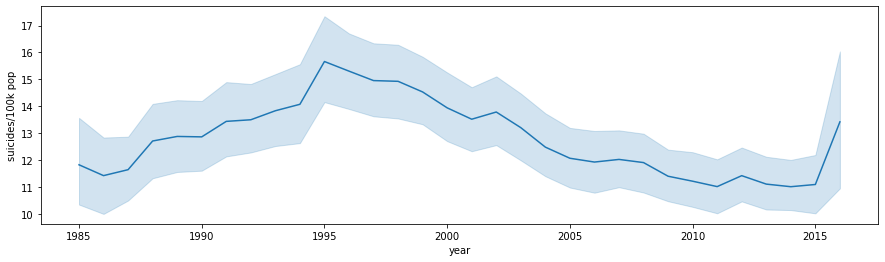

In [103]:
plt.figure(figsize=(15,4))
sns.lineplot(x="year", y="suicides/100k pop",data=df)
# plt.savefig('line_chart.jpg', dpi=300)

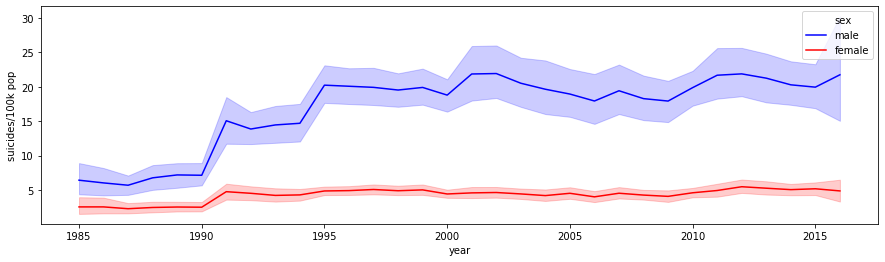

In [66]:
plt.figure(figsize=(15,4))
sns.lineplot(x="year", y="suicides/100k pop",hue = "sex",palette=['blue','red'],data=gx)
# plt.savefig('line_chart.jpg', dpi=300)

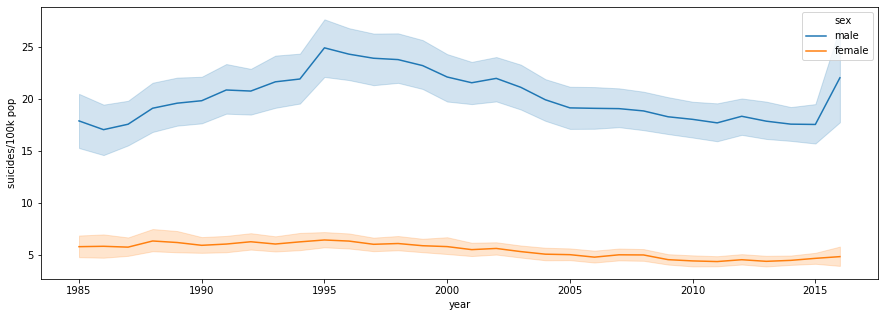

In [88]:
plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="suicides/100k pop",hue = "sex",data=df)
# plt.savefig('line_chart.jpg', dpi=300)

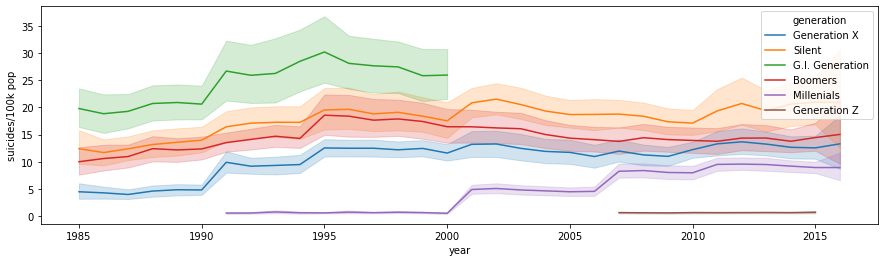

In [82]:
plt.figure(figsize=(15,4))
sns.lineplot(x="year", y="suicides/100k pop",hue = "generation",data=df)

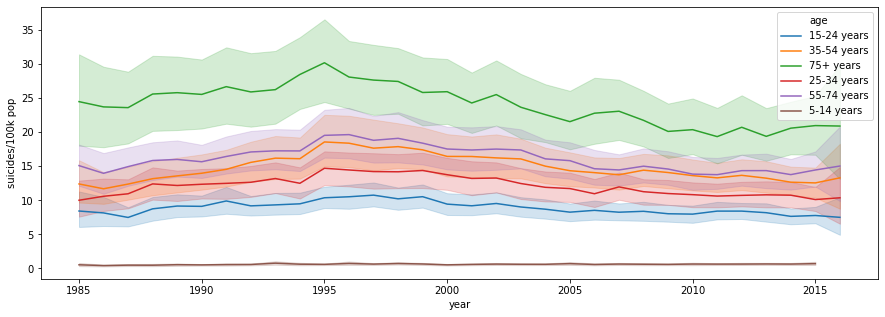

In [89]:
plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="suicides/100k pop",hue = "age",data=df)

In [51]:
gx[gx.sex=="male"]['suicides/100k pop'].describe()

count    3204.000000
mean       16.855977
std        15.917827
min         0.000000
25%         5.117500
50%        13.455000
75%        23.420000
max        94.280000
Name: suicides/100k pop, dtype: float64

In [52]:
gx[gx.sex=="female"]['suicides/100k pop'].describe()

count    3204.000000
mean        4.257772
std         4.350357
min         0.000000
25%         0.947500
50%         3.370000
75%         6.160000
max        57.080000
Name: suicides/100k pop, dtype: float64

In [53]:
# bar chart year~gender/ country~gender

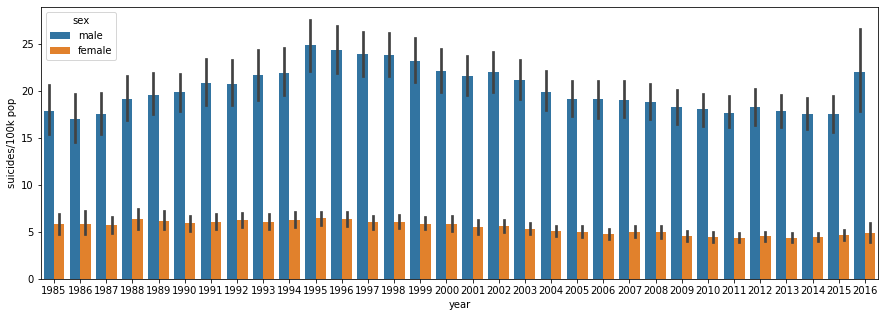

In [90]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="year", y="suicides/100k pop", hue="sex", data=df)

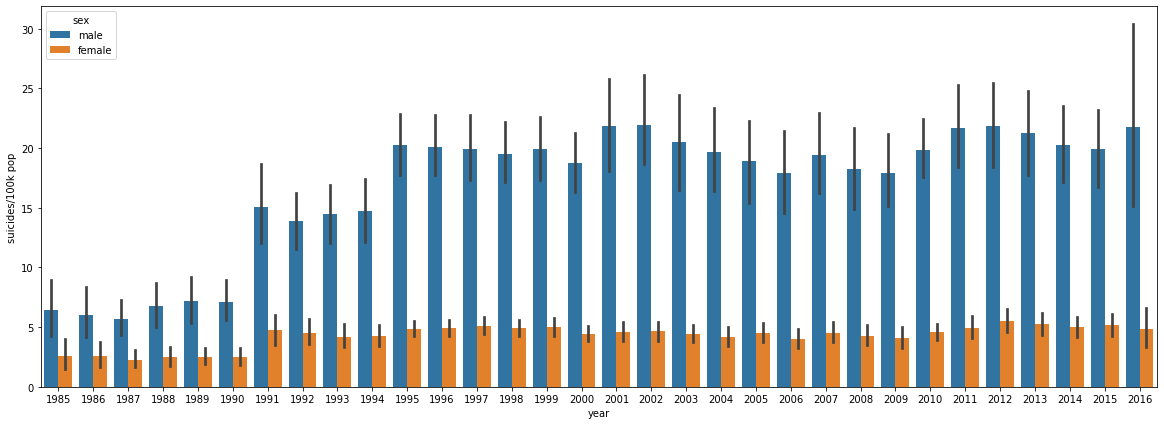

In [55]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x="year", y="suicides/100k pop", hue="sex", data=gx)

In [56]:
countries = gx.country.unique()

In [57]:
gx

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
2,9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
3,11,Albania,1987,male,5-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
4,13,Albania,1988,male,15-24 years,17,319200,5.33,Albania1988,NaN,"2,126,000,000",769,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,27791,Uzbekistan,2012,female,35-54 years,89,3474788,2.56,Uzbekistan2012,0.668,"51,821,573,338",1964,Generation X
6404,27796,Uzbekistan,2013,male,35-54 years,481,3346411,14.37,Uzbekistan2013,0.672,"57,690,453,461",2150,Generation X
6405,27803,Uzbekistan,2013,female,35-54 years,99,3547895,2.79,Uzbekistan2013,0.672,"57,690,453,461",2150,Generation X
6406,27808,Uzbekistan,2014,male,35-54 years,519,3421300,15.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X


In [92]:
df['HDI for year']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
27815    0.675
27816    0.675
27817    0.675
27818    0.675
27819    0.675
Name: HDI for year, Length: 27820, dtype: float64

In [96]:
def hdi_cat(hdi):
    if hdi>=0.8:
        return 'Very High'
    elif (hdi >= 0.7) and (hdi<=0.799):
        return 'High'
    elif (hdi>=0.55) and (hdi<=0.699):
        return 'Median'
    elif hdi<0.55:
        return 'Low'
    else:
        return 

In [97]:
df['hdi_cat'] = df['HDI for year'].apply(hdi_cat)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,hdi_cat
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,None
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,None
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,None
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,None
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Median
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Median
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Median
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Median


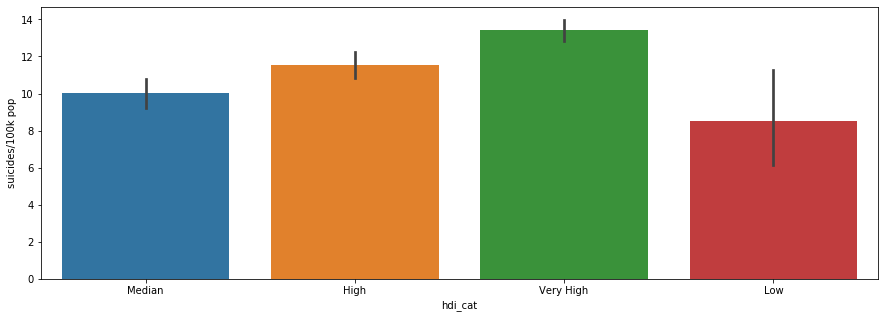

In [102]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="hdi_cat", y="suicides/100k pop", data=df)